In [2]:
import numpy as np
import pandas as pd
from CAPM import *
from drawdown import *
from tseries import *
from block_bootstrap import *

ÏÑ†Î∞∞Îãò ÏûëÏÑ±ÌïòÏã† ÏΩîÎìú ÏÇ¨Ïö©ÌïòÎ†§Í≥† ÌñàÎäîÎç∞ yfinanceÍ∞Ä ÏûëÎèôÏùÑ ÏïàÌï¥ÏÑú csv ÌååÏùº ÏÇ¨Ïö©ÌñàÏùå.

In [ ]:
SP_data()

S&P500 Ï¢ÖÎ™© Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Îäî Ï§ë...
ÏãúÍ∞ÄÏ¥ùÏï° Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Îäî Ï§ë...(ÏãúÍ∞Ñ ÏïΩÍ∞Ñ Í±∏Î†§Ïöî)


In [3]:
sp500_df = pd.read_csv('sp500.csv')
sp500_df

Ticker                                          Name  \
0      MMM                                            3M   
1      AOS                                   A. O. Smith   
2      ABT                           Abbott Laboratories   
3     ABBV                                        AbbVie   
4      ACN                                     Accenture   
..     ...                                           ...   
509    GSG  iShares S&P GSCI Commodity-Indexed Trust ETF   
510    SLV                          iShares Silver Trust   
511    TLT            iShares 20+ Year Treasury Bond ETF   
512    SHY     Vanguard Total Bond Market Index Fund ETF   
513    BIL           iShares 0-3 Month Treasury Bond ETF   

                     Sector                       Subsector  MarketCap  
0               Industrials        Industrial Conglomerates        NaN  
1               Industrials               Building Products        NaN  
2               Health Care           Health Care Equipment        NaN  
3               Health Care                   Biotechnology        NaN  
4    Information Technology  IT Consulting & Other Services        NaN  
..                      ...                             ...        ...  
509         Commodity Index             Composite Commodity        NaN  
510         Commodity Index                          Silver        NaN  
511                    Bond                  Long-term Bond        NaN  
512                    Bond                  Composite Bond        NaN  
513                    Bond                 Short-term Bond        NaN  

[514 rows x 5 columns]

Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [4]:
selected_price_data = pd.read_csv("selected_price_data.csv")
selected_price_data = selected_price_data.set_index('Date')

1ÎÖÑ, 3ÎÖÑ Îã®Ïàú ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞

In [5]:
cum_returns_1yr, cum_returns_3yr = price_data(selected_price_data)

ÏµúÏÜå, ÏµúÎåÄÎπÑÏ§ë Î∞è ÎàÑÏ†Å ÏàòÏùµÎ•† Ïñ¥Îñ§ Í≤É Ïì∏ Í≤ÉÏù∏ÏßÄ Í≥ÑÏÇ∞

In [6]:
x_min = 0.005
x_max = 0.5
y = cum_returns_1yr

Max Drawdown Î™®Ìòï, gammaÎäî ÏµúÎåÄ ÌóàÏö© drawdown ÏùòÎØ∏, ÏùºÎã®ÏùÄ ÎÖºÎ¨∏ Í∞í Í∏∞Î∞òÏúºÎ°ú ÌñàÎäîÎç∞ historical data ÌôïÏù∏ÌïòÍ≥† Ï†ÅÎãπÌûà Ïû°ÏïÑÎèÑ Í¥úÏ∞ÆÏùÑÎìØ! Í∑ºÎç∞ ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ ÏΩîÎìúÍ∞Ä ÏûëÎèôÏùÑ ÏïàÌï®..

In [7]:
#m, x, u = maxdd_model(cum_returns_1yr, 0.08, x_min, x_max)
gamma_lst = [x/100 for x in range(4, 31)]
results_maxdd = []
results_maxdd_weights = []
for gamma in gamma_lst:
    model, x_var, u_var, max_dd_var = maxdd_model(y, gamma, x_min, x_max, leverage=None)
    model.optimize()

    # 1) ÏµúÏ†Å ÎπÑÏ§ë Î≤°ÌÑ∞
    x_opt = np.array([x_var[i].X for i in range(len(x_var))])

    # 2) ÎàÑÏ†ÅÏàòÏùµ ÏãúÍ≥ÑÏó¥ (numpy Í≥ÑÏÇ∞)
    w_vals = y.values @ x_opt                 # shape (T,)

    # 3) running max, drawdown
    u_vals = np.maximum.accumulate(w_vals)    # Î≤°ÌÑ∞
    dd_vals = u_vals - w_vals                 # Î≤°ÌÑ∞

    max_dd = dd_vals.max()


    print(f"Max¬†DD¬†(actual)¬†= {max_dd:.4f}")
    optimal_weight = dict(zip(y.columns, x_opt))
    print(f"Sum of Weights   = {x_opt.sum():.4f}")
    results_maxdd.append({
        "gamma": gamma,
        "max_dd": max_dd,
        "ObjVal": model.ObjVal,
        "Reward/Risk": model.ObjVal / max_dd
    })

    results_maxdd_weights.append(optimal_weight)
# 5) Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
results_df_1 = pd.DataFrame(results_maxdd)
results_df_2 = pd.DataFrame(results_maxdd_weights)

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 302 columns and 25752 nonzeros
Model fingerprint: 0x509bfc09
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [4e-02, 1e+00]
Presolve removed 468 rows and 1 columns
Presolve time: 0.01s
Presolved: 289 rows, 552 columns, 13758 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   6.063884e+01   0.000000e+00      0s
     296    1.7884670e-01   0.000000e+00   0.000000e+00      0s

Solved in 296 iterations and 0.01 seconds (0.02 work units)
Optimal objective  1.788467002e-01
Max¬†DD¬†(actual)¬†= 0.0400
Sum of

c:\Users\chlwl\Projects\AdvancedPortfolioTheory\MinSeok\drawdown.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)



Solved in 321 iterations and 0.01 seconds (0.02 work units)
Optimal objective  2.357647457e-01
Max¬†DD¬†(actual)¬†= 0.0500
Sum of Weights   = 1.0000
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 302 columns and 25752 nonzeros
Model fingerprint: 0xe2ba2dce
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [6e-02, 1e+00]
Presolve removed 468 rows and 1 columns
Presolve time: 0.01s
Presolved: 289 rows, 552 columns, 13758 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   6.076884e+01   0.000000e+00      0s
     314    2.8775807e-01   0.000000e+00   0.000000e+00      0s

Solved in 314 iterations and 0.01 seconds (0.02 w

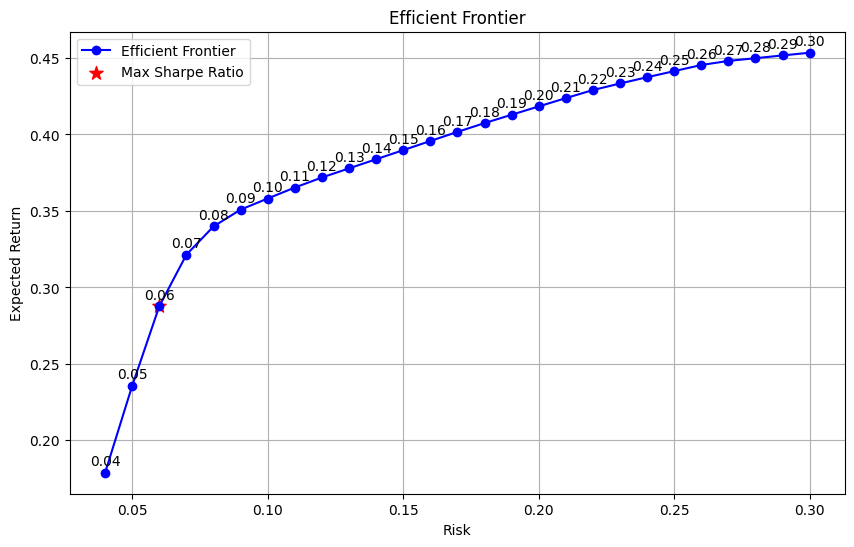

In [8]:
plot_efficient_frontier(results_df_1, "max_dd")

In [9]:
merged_df_maxdd = pd.concat([results_df_1.T, results_df_2.T], axis=0)
merged_df_maxdd.to_csv("maxdd_results_leverage_no.csv")

Avg drawdown Î∂ÄÎ∂Ñ. ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú gammaÎäî Îã§Î•∏Í±∞Î°ú Î∞îÍøîÎèÑ ÎêòÎäîÎç∞ Í∞íÏù¥ Ïï†Îß§ÌïòÎ©¥ ÏûëÎèôÏùÑ ÏïàÌï®.

In [10]:
#m, x, u = maxdd_model(cum_returns_1yr, 0.08, x_min, x_max)
gamma_lst = list(np.arange(0.02, 0.15, 0.005))
results_avgdd = []
results_avgdd_weights = []
for gamma in gamma_lst:
    model, x_var, u_var, dd_var = avgdd_model(y, gamma, x_min, x_max) #, leverage='Y')
    model.optimize()

    # 1) ÏµúÏ†Å ÎπÑÏ§ë Î≤°ÌÑ∞
    x_opt = np.array([x_var[i].X for i in range(len(x_var))])

    # 2) ÎàÑÏ†ÅÏàòÏùµ ÏãúÍ≥ÑÏó¥ (numpy Í≥ÑÏÇ∞)
    w_vals = y.values @ x_opt                 # shape (T,)

    # 3) running max, drawdown
    u_vals = np.maximum.accumulate(w_vals)    # Î≤°ÌÑ∞
    dd_vals = u_vals - w_vals                 # Î≤°ÌÑ∞

    avg_dd = dd_vals.mean()

    print(f"Avg¬†DD¬†(actual)¬†= {avg_dd:.4f}")
    print(f"Optimal Weights  = {x_opt}")
    print(f"Sum of Weights   = {x_opt.sum():.4f}")
    results_avgdd.append({
        "gamma": gamma,
        "avg_dd": avg_dd,
        "ObjVal": model.ObjVal,
        "Reward/Risk": model.ObjVal / avg_dd
    })
    optimal_weight = dict(zip(y.columns, x_opt))
    results_avgdd_weights.append(optimal_weight)
results_df_1 = pd.DataFrame(results_avgdd)
results_df_2 = pd.DataFrame(results_avgdd_weights)
merged_df_avgdd = pd.concat([results_df_1.T, results_df_2.T], axis=0)
merged_df_avgdd.to_csv("avgdd_results_leverage.csv")

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 553 columns and 26255 nonzeros
Model fingerprint: 0x27558fd3
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [2e-02, 1e+00]
Presolve removed 215 rows and 0 columns
Presolve time: 0.01s
Presolved: 542 rows, 553 columns, 27182 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   1.425051e+02   0.000000e+00      0s
     345    3.9464495e-01   0.000000e+00   0.000000e+00      0s

Solved in 345 iterations and 0.02 seconds (0.03 work units)
Optimal objective  3.946449476e-01
Avg¬†DD¬†(actual)¬†= 0.0200
Optimal Weights  = [0.005      0.005      0.005      0.005      0.005      0

c:\Users\chlwl\Projects\AdvancedPortfolioTheory\MinSeok\drawdown.py:219: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)


Presolve time: 0.01s
Presolved: 542 rows, 553 columns, 27182 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   1.425051e+02   0.000000e+00      0s
     337    4.0730964e-01   0.000000e+00   0.000000e+00      0s

Solved in 337 iterations and 0.02 seconds (0.03 work units)
Optimal objective  4.073096370e-01
Avg¬†DD¬†(actual)¬†= 0.0250
Optimal Weights  = [0.005      0.005      0.005      0.005      0.005      0.005
 0.005      0.005      0.005      0.005      0.005      0.005
 0.22641656 0.005      0.12148058 0.005      0.005      0.005
 0.005      0.005      0.005      0.005      0.005      0.005
 0.005      0.005      0.005      0.005      0.29460254 0.005
 0.005      0.005      0.005      0.005      0.005      0.005
 0.005      0.005      0.005      0.005      0.005      0.13250032
 0.005      0.005      0.005      0.005      0.005      0.005
 0.005     ]
Sum of Weights   = 1.0000
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win6

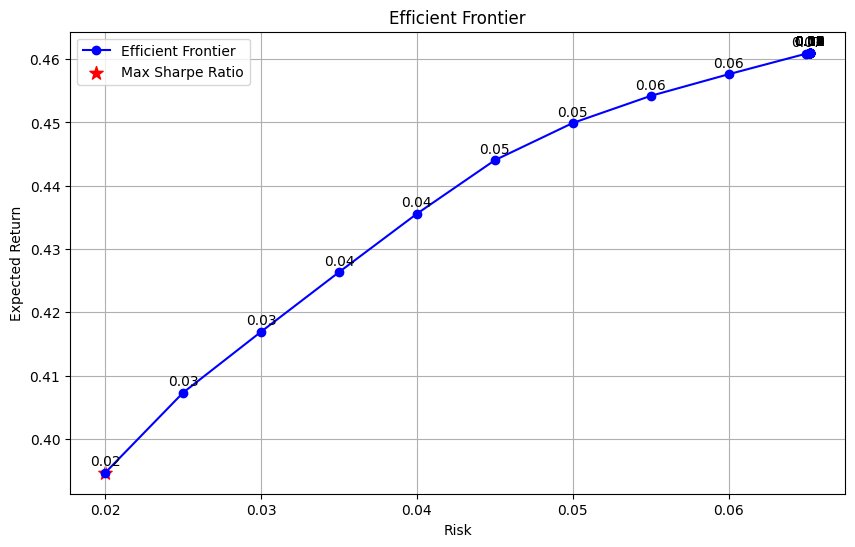

In [11]:
plot_efficient_frontier(results_df_1, "avg_dd")

C-DaR

In [12]:
#m, x, u = maxdd_model(cum_returns_1yr, 0.08, x_min, x_max)
gamma_lst = list(np.arange(0.02, 0.15, 0.005))
results_cdar = []
results_cdar_weights = []
alpha = 0.95
for gamma in gamma_lst:
    m, x_var, _, z0_var, z_var, max_dd_var = cdar_model(
                    y, gamma, alpha, x_min, x_max)
    m.optimize()

    # 1) ÏµúÏ†Å ÎπÑÏ§ë Î≤°ÌÑ∞
    w_opt = np.array([x_var[i].X for i in range(len(x_var))])
    port_path = y.values @ w_opt          # ÎàÑÏ†Å ÏàòÏùµ ÏãúÍ≥ÑÏó¥
    running   = np.maximum.accumulate(port_path)
    drawdown  = running - port_path

    maxdd_real = drawdown.max()           # Ïã§Ï†ú MaxDD
    cdar_real  = 0
    thresh   = z0_var.X
    excess   = np.maximum(drawdown - thresh, 0).mean()
    cdar_real = thresh + excess / (1-alpha)

    R = m.ObjVal

    print(f"Avg¬†DD¬†(actual)¬†= {avg_dd:.4f}")
    print(f"Optimal Weights  = {x_opt}")
    print(f"Sum of Weights   = {x_opt.sum():.4f}")
    results_cdar.append({
        "gamma": gamma,
        "CDaR": cdar_real,
        "ObjVal": R,
        "Reward/Risk": R / cdar_real
    })
    optimal_weight = dict(zip(y.columns, x_opt))
    results_cdar_weights.append(optimal_weight)
results_df_1 = pd.DataFrame(results_cdar)
results_df_2 = pd.DataFrame(results_cdar_weights)
merged_df_cdar = pd.concat([results_df_1.T, results_df_2.T], axis=0)
merged_df_cdar.to_csv("CDaR_results.csv")

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1010 rows, 555 columns and 39361 nonzeros
Model fingerprint: 0x7e7e30ef
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [2e-02, 1e+00]
Presolve removed 468 rows and 2 columns
Presolve time: 0.01s
Presolved: 542 rows, 553 columns, 27424 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier performed 0 iterations in 0.02 seconds (0.02 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Iteration    Objective       Primal Inf.    Dual Inf.      Time
     168    1.5008687e-01   0.000000e+00   0.000000e+00

c:\Users\chlwl\Projects\AdvancedPortfolioTheory\MinSeok\drawdown.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)



CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1010 rows, 555 columns and 39361 nonzeros
Model fingerprint: 0xb6f8b1de
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 468 rows and 2 columns
Presolve time: 0.01s
Presolved: 542 rows, 553 columns, 27424 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier performed 0 iterations in 0.02 seconds (0.02 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Iteration    Objective       Primal Inf.    Dual Inf.      Time
     183    1.9240036e-01   0.000000e+00   0.000000e+00      0s

Solved in 183 iterations and 0.02 seconds (0.02 work units)
Optimal obje

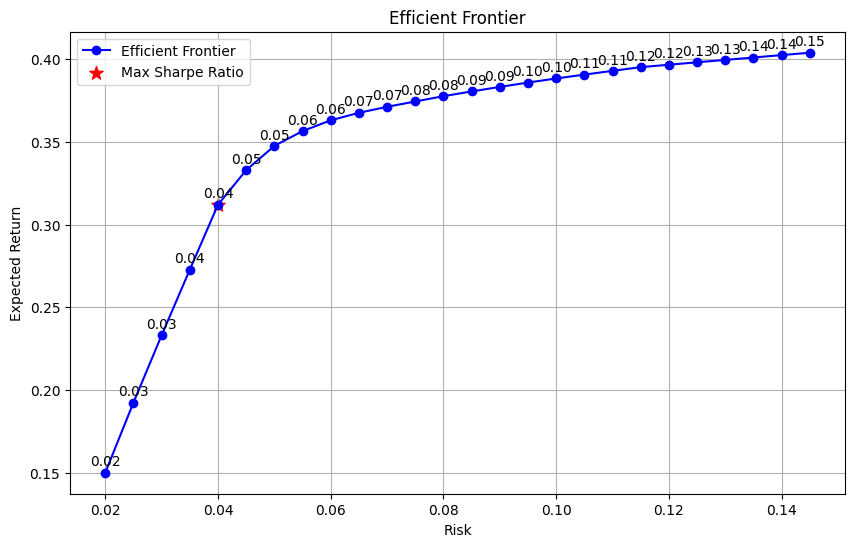

In [13]:
plot_efficient_frontier(results_df_1, "CDaR")

Conditional Drawdown at Risk vs Max DD

In [ ]:
gamma_lst = list(np.arange(0.05, 0.2, 0.01))
alpha_lst = [1, 0.95, 0.6, 0]
records = []          # (Œ±, Œ≥, R, MaxDD, CDaR) Ï†ÄÏû•

for alpha in alpha_lst:
    c_label = f"{int((1-alpha)*100)}% CDaR"

    for gamma in gamma_lst:

        # --- Î™®Îç∏ ÏÑ†ÌÉù ----------------------------------
        if alpha == 1:
            m, x_var, _, max_dd_var = maxdd_model(y, gamma, x_min, x_max) #, leverage='Y')
        else:
            m, x_var, _, z0_var, z_var, max_dd_var = cdar_model(
                    y, gamma, alpha, x_min, x_max) #, leverage='Y')

        m.optimize()

        # --- weight Î≤°ÌÑ∞ & Í≤ΩÎ°ú Î¶¨Ïä§ÌÅ¨ Í≥ÑÏÇ∞ ---------------
        w_opt = np.array([x_var[i].X for i in range(len(x_var))])
        port_path = y.values @ w_opt          # ÎàÑÏ†Å ÏàòÏùµ ÏãúÍ≥ÑÏó¥
        running   = np.maximum.accumulate(port_path)
        drawdown  = running - port_path

        maxdd_real = drawdown.max()           # Ïã§Ï†ú MaxDD
        cdar_real  = 0
        if alpha != 1:
            thresh   = z0_var.X
            excess   = np.maximum(drawdown - thresh, 0).mean()
            cdar_real = thresh + excess / (1-alpha)

        R = m.ObjVal                          # Ïó∞ÌôòÏÇ∞ Í∏∞ÎåÄÏàòÏùµ (Î™©Ï†ÅÌï®Ïàò)

        records.append({
            "alpha": alpha,
            "c_label": c_label,
            "gamma": gamma,
            "R": R,
            "MaxDD": maxdd_real,
            "AvDD" : drawdown.mean(),
            "CDaR": cdar_real
        })

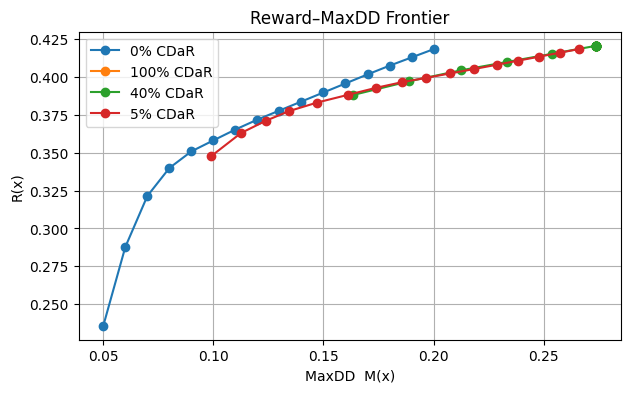

In [15]:
df = pd.DataFrame(records)

plt.figure(figsize=(7,4))
for c_label, grp in df.groupby("c_label"):
    plt.plot(grp["MaxDD"], grp["R"],
             marker='o', label=c_label)

plt.xlabel("MaxDD  M(x)")
plt.ylabel("R(x)")
plt.title("Reward‚ÄìMaxDD Frontier")
plt.grid(True); plt.legend(); plt.show()

Conditional Drawdown at Risk vs Avg DD

In [16]:
gamma_lst = list(np.arange(0.03, 0.07, 0.005))
alpha_lst = [1, 0.95, 0.6, 0]
records = []          # (Œ±, Œ≥, R, MaxDD, CDaR) Ï†ÄÏû•

for alpha in alpha_lst:
    c_label = f"{int((1-alpha)*100)}% CDaR"

    for gamma in gamma_lst:

        # --- Î™®Îç∏ ÏÑ†ÌÉù ----------------------------------
        if alpha == 1:
            m, x_var, _, max_dd_var = maxdd_model(y, gamma, x_min, x_max) #, leverage='Y')
        else:
            m, x_var, _, z0_var, z_var, max_dd_var = cdar_model(
                    y, gamma, alpha, x_min, x_max) #, leverage='Y')

        m.optimize()

        # --- weight Î≤°ÌÑ∞ & Í≤ΩÎ°ú Î¶¨Ïä§ÌÅ¨ Í≥ÑÏÇ∞ ---------------
        w_opt = np.array([x_var[i].X for i in range(len(x_var))])
        port_path = y.values @ w_opt          # ÎàÑÏ†Å ÏàòÏùµ ÏãúÍ≥ÑÏó¥
        running   = np.maximum.accumulate(port_path)
        drawdown  = running - port_path

        maxdd_real = drawdown.max()           # Ïã§Ï†ú MaxDD
        cdar_real  = 0
        if alpha != 1:
            thresh   = z0_var.X
            excess   = np.maximum(drawdown - thresh, 0).mean()
            cdar_real = thresh + excess / (1-alpha)

        R = m.ObjVal                          # Ïó∞ÌôòÏÇ∞ Í∏∞ÎåÄÏàòÏùµ (Î™©Ï†ÅÌï®Ïàò)

        records.append({
            "alpha": alpha,
            "c_label": c_label,
            "gamma": gamma,
            "R": R,
            "MaxDD": maxdd_real,
            "AvDD" : drawdown.mean(),
            "CDaR": cdar_real
        })

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 302 columns and 25752 nonzeros
Model fingerprint: 0x8b9944d7
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 468 rows and 1 columns
Presolve time: 0.01s
Presolved: 289 rows, 552 columns, 13758 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   6.057384e+01   0.000000e+00      0s
     313    1.1079477e-01   0.000000e+00   0.000000e+00      0s

Solved in 313 iterations and 0.01 seconds (0.02 work units)
Optimal objective  1.107947675e-01


c:\Users\chlwl\Projects\AdvancedPortfolioTheory\MinSeok\drawdown.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 302 columns and 25752 nonzeros
Model fingerprint: 0x6101d882
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 468 rows and 1 columns
Presolve time: 0.01s
Presolved: 289 rows, 552 columns, 13758 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   6.060634e+01   0.000000e+00      0s
     291    1.4657071e-01   0.000000e+00   0.000000e+00      0s

Solved in 291 iterations and 0.01 seconds (0.02 work units)
Optimal objective  1.465707084e-01
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen I

c:\Users\chlwl\Projects\AdvancedPortfolioTheory\MinSeok\drawdown.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)



CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1010 rows, 555 columns and 39361 nonzeros
Model fingerprint: 0xa1c348b5
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 468 rows and 2 columns
Presolve time: 0.01s
Presolved: 542 rows, 553 columns, 27424 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier performed 0 iterations in 0.02 seconds (0.02 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Iteration    Objective       Primal Inf.    Dual Inf.      Time
     147    2.7273352e-01   0.000000e+00   0.000000e+00      0s

Solved in 147 iterations and 0.02 seconds (0.02 work units)
Optimal obje

In [17]:
gamma_lst = list(np.arange(0.03, 0.2, 0.005))
alpha_lst = [1, 0.95, 0.6, 0]

records = []      # (Œ±,Œ≥,R,AvDD,MaxDD,CDaR)

records = []        # Ïó¨Í∏∞Îã§ Ìïú Ï§ÑÏî© dict ÎÑ£Í∏∞

for alpha in alpha_lst:
    for gamma in gamma_lst:
        c_label = f"{int((1-alpha)*100)}% CDaR"
        # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        # ‚ë† Î™®Îç∏ Ìò∏Ï∂ú (alpha Í∞íÏóê Îî∞Îùº 3‚ÄëWay Î∂ÑÍ∏∞)
        # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        if alpha == 1:                      # ---- MaxDD Î™®Îç∏ ----
            m, x_var, _, maxdd_var = maxdd_model(y, gamma, x_min, x_max)

        elif alpha == 0:                    # ---- AvDD Î™®Îç∏ ----
            m, x_var, _, dd_var   = avgdd_model(y, gamma, x_min, x_max)

        else:                               # ---- CDaR + MaxDD ----
            m, x_var,u, z0_var, z_var, maxdd_var = cdar_model(
                    y, gamma, alpha, x_min, x_max)

        m.optimize()

        # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        # ‚ë° Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≤ΩÎ°ú Î∞è Î¶¨Ïä§ÌÅ¨ Í≥ÑÏÇ∞
        # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        w_opt      = np.array([x_var[i].X for i in range(len(x_var))])
        path       = y.values @ w_opt
        running    = np.maximum.accumulate(path)
        drawdown   = running - path

        maxdd_real = drawdown.max()
        avdd_real  = drawdown.mean()
        cdar_real  = None

        if 0 < alpha < 1:
            thresh     = z0_var.X
            excess     = np.maximum(drawdown - thresh, 0).mean()
            cdar_real  = thresh + excess / (1 - alpha)

        # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        # ‚ë¢ Í≤∞Í≥º dict ÎßåÎì§Ïñ¥ records Ïóê Ï∂îÍ∞Ä
        # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        records.append({
            "alpha" : alpha,
            "gamma" : gamma,
            "R"     : m.ObjVal,        # Î™©Ï†ÅÌï®Ïàò Í∞í (Ïó∞ÌôòÏÇ∞ Í∏∞ÎåÄÏàòÏùµ)
            "MaxDD" : maxdd_real,
            "AvDD"  : avdd_real,
            "CDaR"  : cdar_real,
            "c_label" : c_label                # CDaR Í≥ÑÏÇ∞Îêú Í≤ΩÏö∞Îßå Ïà´Ïûê, else None
        })

# DataFrame ÏúºÎ°ú Î≥ÄÌôòÌï¥ ÏÇ¨Ïö©
df_results = pd.DataFrame(records)
print(df_results.head())

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 302 columns and 25752 nonzeros
Model fingerprint: 0x8b9944d7
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 468 rows and 1 columns
Presolve time: 0.01s
Presolved: 289 rows, 552 columns, 13758 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   6.057384e+01   0.000000e+00      0s
     313    1.1079477e-01   0.000000e+00   0.000000e+00      0s

Solved in 313 iterations and 0.01 seconds (0.02 work units)
Optimal objective  1.107947675e-01
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen I

c:\Users\chlwl\Projects\AdvancedPortfolioTheory\MinSeok\drawdown.py:219: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i5-13400F, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 757 rows, 553 columns and 26255 nonzeros
Model fingerprint: 0x535137f7
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e-03, 6e-01]
  Bounds range     [5e-03, 5e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 215 rows and 0 columns
Presolve time: 0.01s
Presolved: 542 rows, 553 columns, 27182 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8960805e-01   1.187976e+02   0.000000e+00      0s
     341    4.2634648e-01   0.000000e+00   0.000000e+00      0s

Solved in 341 iterations and 0.02 seconds (0.03 work units)
Optimal objective  4.263464797e-01
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen I

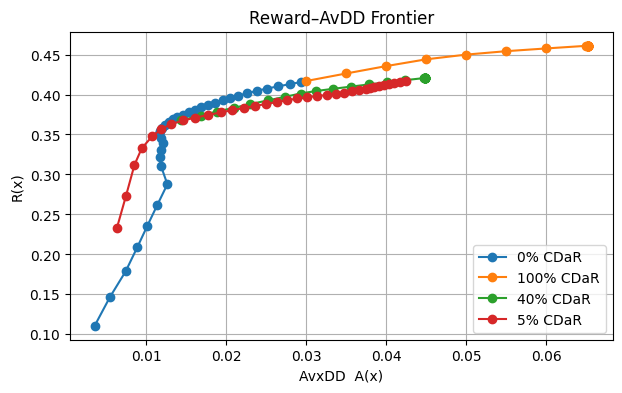

In [18]:
plt.figure(figsize=(7,4))
for c_label, grp in df_results.groupby("c_label"):
    plt.plot(grp["AvDD"], grp["R"],
             marker='o', label=c_label)

plt.xlabel("AvxDD  A(x)")
plt.ylabel("R(x)")
plt.title("Reward‚ÄìAvDD Frontier")
plt.grid(True); plt.legend(); plt.show()

Í≥ºÍ±∞ Î°úÍ∑∏ÏàòÏùµÎ•† Ï†ïÏÉÅÏÑ± Í≤ÄÏÇ¨, GARCH ÌîºÌåÖ ÌõÑ ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï, Î™ªÏì∞Îäî ÏûêÏÇ∞ Ï†úÍ±∞

In [99]:
log_ret_lst_1yr, log_ret_lst_3yr, unstationary_1yr, unstationary_3yr = check_stationary(selected_price_data)

In [100]:
result_lst = []

In [84]:
remove_assets = ['KMI', 'AJG', 'MS', 'BSX', 'MSFT', 'ACN']

filtered_df_1yr = log_ret_lst_1yr.drop(columns=remove_assets)

In [ ]:
params_df, C, Z = fit_garch_df(filtered_df_1yr)

C:\Users\Ï±ÑÎØºÏÑù\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02058. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Ï±ÑÎØºÏÑù\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002914. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This wa

In [103]:
filtered_df_3yr = log_ret_lst_3yr.drop(columns=['AVGO'])

In [105]:
for i in list(params_df.index):
    if params_df.loc[i, 'alpha']+params_df.loc[i, 'beta'] >= 1:
        print(i)

Îã§Î≥ÄÏàò Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò(ÏûîÏ∞® ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥†Î†§)

In [106]:
simulated_prices = monte_carlo_with_correlation(757, selected_price_data, params_df, C)
print(f"ÏÉùÏÑ±Îêú Í≤ΩÎ°ú shape: {simulated_prices.shape}")  # (252, 1000, 3)

ÏÉùÏÑ±Îêú Í≤ΩÎ°ú shape: (757, 1000, 48)


ÏàòÏùµ Îã®Ïàú ÎàÑÏ†ÅÌï© Í≥ÑÏÇ∞

In [108]:
def cumulative_returns_simple(simulated_prices):
    """
    Monte Carlo ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥ºÏóêÏÑú ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Îã®Ïàú ÏàòÏùµÎ•† Í∏∞Î∞ò)
    - simulated_prices: (T, n_sim, n_assets) Î∞∞Ïó¥
    """
    T, n_sim, n_assets = simulated_prices.shape

    # Îã®Ïàú ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    simple_returns = simulated_prices[1:] / simulated_prices[:-1] - 1

    # ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    cum_returns = np.cumsum(simple_returns, axis=0)

    # DataFrame ÌòïÌÉúÎ°ú Î≥ÄÌôò (ÏûêÏÇ∞Î≥ÑÎ°ú ÎàÑÏ†Å ÏàòÏùµÎ•† Ìè¨Ìï®)
    cum_returns_df = {}
    for asset in range(n_assets):
        asset_name = list(filtered_df_3yr)[asset]
        # Í∞Å ÏûêÏÇ∞Ïùò ÎàÑÏ†Å ÏàòÏùµÎ•†ÏùÑ DataFrameÏúºÎ°ú Ï†ÄÏû•
        cum_returns_df[asset_name] = pd.DataFrame(cum_returns[:, :, asset], 
                                                 columns=[f"Path_{i+1}" for i in range(n_sim)])
    return cum_returns_df

# ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
cum_returns_df = cumulative_returns_simple(simulated_prices)

# Ï≤´ Î≤àÏß∏ ÏûêÏÇ∞Ïùò ÎàÑÏ†Å ÏàòÏùµÎ•† ÌôïÏù∏


In [109]:
# cum_returns_dfÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ CSVÎ°ú Ï†ÄÏû•
for key, value in cum_returns_df.items():
    # valueÍ∞Ä DataFrameÏù∏ÏßÄ ÌôïÏù∏ ÌõÑ Ï†ÄÏû•
    if isinstance(value, pd.DataFrame):
        value.to_csv(f"cum_returns_df_{key}_3yr.csv", index=True, encoding='utf-8-sig')
    else:
        print(f"'{key}'Îäî DataFrameÏù¥ ÏïÑÎãôÎãàÎã§.")


path Î≥Ñ ÏûêÏÇ∞ CDaR Í≥ÑÏÇ∞

In [16]:
def extract_path(cum_returns_df, path_name):
    """
    Î™®Îì† ÏûêÏÇ∞Ïóê ÎåÄÌï¥ ÌäπÏ†ï Í≤ΩÎ°úÏùò Í∞íÏùÑ Ï∂îÏ∂ú
    - cum_returns_df: ÎàÑÏ†Å ÏàòÏùµÎ•† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÇ¨Ï†Ñ
    - path_name: Ï∂îÏ∂úÌï† Í≤ΩÎ°ú Ïù¥Î¶Ñ (Ïòà: 'Path_1')
    """
    # Î™®Îì† ÏûêÏÇ∞Ïóê ÎåÄÌï¥ Path_1 Í∞í Ï∂îÏ∂ú
    path_values = {asset_name: df[path_name] for asset_name, df in cum_returns_df.items()}
    
    # DataFrameÏúºÎ°ú Î≥ÄÌôò
    path_df = pd.DataFrame(path_values)
    return path_df

def test_cdar_multiple_paths(cum_returns_df, gamma, alpha, x_min, x_max):
    """
    CDaR ÌÖåÏä§Ìä∏ Ìï®Ïàò (Í≤ΩÎ°úÎ≥Ñ ÏµúÏ†ÅÌôî)
    - cum_returns_df: ÎàÑÏ†Å ÏàòÏùµÎ•† DataFrame ÏÇ¨Ï†Ñ (ÏûêÏÇ∞Î≥ÑÎ°ú ÎÇòÎâ®)
    - gamma: ÌóàÏö© ÏµúÎåÄ CDaR
    - alpha: Ïã†Î¢∞ÏàòÏ§Ä (Ïòà: 0.95)
    """
    optimal_weights_list = []
    cdar_values = []
    results_cdar_mc = []
    error_path = []
    # Í∞Å Í≤ΩÎ°úÎ•º Î∞òÎ≥µ Ïã§Ìñâ
    num_paths = list(cum_returns_df.values())[0].shape[1]  # Í≤ΩÎ°ú Ïàò
    for path in range(num_paths):
        try : 
            
            print(f"üîç Í≤ΩÎ°ú {path+1}/{num_paths} ÌÖåÏä§Ìä∏ Ï§ë...")
            
            # Í≤ΩÎ°úÎ≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ± (ÏûêÏÇ∞ x Í∏∞Í∞Ñ ÌòïÌÉúÎ°ú Ï†ÑÌôò)
            y = extract_path(cum_returns_df, f'Path_{path+1}')
            y.columns = cum_returns_df.keys()
            
            # Í∏∞Ï°¥ CDaR Ìï®Ïàò ÌôúÏö©
            model, x_var, u_var, z0_var, z_var = cdar_model(y, gamma, alpha,
                                                    x_min, x_max)
            model.optimize()

            # ÏµúÏ†Å ÎπÑÏ§ë
            x_opt = np.array([x_var[i].X for i in range(len(x_var))])

            # Ïã§Ï†ú CDaR Í≥ÑÏÇ∞ (Í≤ÄÏ¶ùÏö©)
            w_vals  = y.values @ x_opt
            u_vals  = np.maximum.accumulate(w_vals)
            dd_vals = u_vals - w_vals
            threshold = z0_var.X
            excess   = np.maximum(dd_vals - threshold, 0)
            cdar = threshold + excess.mean() / (1 - alpha)

            print(f"CDaR   = {cdar:.4f} (Œ≥ = {gamma})")
            print(f"max DD = {dd_vals.max():.4f}")
            results_cdar_mc.append({
                    "path" : path+1,
            "gamma": gamma,
            "cdar": cdar,
            "ObjVal": model.ObjVal,
            "Reward/Risk": model.ObjVal / cdar, 
            "z" : z0_var.X,
            "maxdd" : dd_vals.max()
        })
            optimal_weight = dict(zip(y.columns, x_opt))
            optimal_weights_list.append(optimal_weight)
                
        except:
            error_path.append(path+1)
    results_df_1 = pd.DataFrame(results_cdar_mc)
    results_df_2 = pd.DataFrame(optimal_weights_list)
    merged_df_avgdd = pd.concat([results_df_1.T, results_df_2.T], axis=0)
    merged_df_avgdd.to_csv(f"cdar_results_mc_{alpha}_{gamma}.csv")    


In [ ]:
# ÌÖåÏä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
gamma_lst = list(np.arange(0.03, 0.13, 0.01))  # ÌóàÏö© ÏµúÎåÄ CDaR
alpha = 0.95  # Ïã†Î¢∞ÏàòÏ§Ä

# CDaR Î™®Îç∏ ÌÖåÏä§Ìä∏ Ïã§Ìñâ (Îã§Ï§ë Í≤ΩÎ°ú Í∏∞Î∞ò)
for gamma in gamma_lst:
    test_cdar_multiple_paths(cum_returns_df, gamma, alpha, x_min, x_max)

